# Wild Fires caused by the weather
## Part 3: Exploratory Data Analysis - EDA

In this part, we will analyze the data we have. <br>
We will show the connection between different features and will explore new findings. <br>

#### Preceding Step - import modules (packages)
This step is necessary in order to use external packages. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#!pip install plotly
#!pip install cv2
import plotly.express as px
import cv2

#### Global variables and constants
Here we define our global variables we will use in this notebook

In [2]:
## CSV files 
CSV_BEFORE_OUTLIERS_HANDLING = "Wildfire_history_data_before_outliers_handling.csv"
FIRE_HISTORY_CSV = "Wildfire_history_final.csv"
FULL_MAP_PNG = "FullMap.png"
USA_MAP_PNG = "USAMap.png"

#### Load CSVs
Here we will load our CSVs

In [3]:
df_with_outliers = pd.read_csv(CSV_BEFORE_OUTLIERS_HANDLING)
df_with_outliers

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,POOCounty,InitialLatitude,InitialLongitude,FireCause,FireDuration,CausedByWeather
0,2020-MTLG42-000224,2020-08-06T18:58:00,2020-08-12T14:00:00,Carter,45.78496,-104.49580,2,6,0
1,2017-MTNWS-000878,2017-10-17T20:20:24,2017-11-09T21:59:59,Flathead,48.07167,-114.83030,2,23,0
2,2020-MSMNF-000308,2020-11-23T19:17:00,2020-11-30T14:29:59,Perry,31.06819,-89.06972,2,7,0
3,2019-UTUWF-000883,2019-10-26T21:29:00,2019-11-13T00:14:59,Utah,40.07631,-111.41820,4,18,0
4,2020-MTCES-006641,2020-08-27T14:06:38,2020-08-27T20:52:59,Beaverhead,44.65363,-111.56360,1,0,1
...,...,...,...,...,...,...,...,...,...
108082,2022-OKWSR-001355,2022-05-17T15:45:00,2022-05-18T10:30:00,Custer,35.60432,-99.27886,2,1,0
108083,2022-MTLNF-200253,2022-05-18T15:17:59,2022-05-18T16:26:00,Missoula,46.83358,-114.10830,2,0,0
108084,2022-AZA4S-220586,2022-05-17T23:56:51,2022-05-18T21:59:59,Maricopa,33.94848,-112.86590,2,1,0
108085,2022-ORDEF-000157,2022-05-18T19:21:08,2022-05-18T21:41:00,Deschutes,43.77030,-121.52920,2,0,0


In [4]:
df = pd.read_csv(FIRE_HISTORY_CSV)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,POOCounty,InitialLatitude,InitialLongitude,FireCause,FireDuration,CausedByWeather,Temperature,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Humidity
0,2020-MTLG42-000224,2020-08-06T18:58:00,2020-08-12T14:00:00,Carter,45.78496,-104.49580,2,6,0,25.9,34.0,16.5,21.9,206.63,46.67
1,2017-MTNWS-000878,2017-10-17T20:20:24,2017-11-09T21:59:59,Flathead,48.07167,-114.83030,2,23,0,6.1,12.9,-3.3,13.9,119.55,64.20
2,2020-MSMNF-000308,2020-11-23T19:17:00,2020-11-30T14:29:59,Perry,31.06819,-89.06972,2,7,0,10.3,22.7,0.6,11.2,104.88,78.07
3,2019-AZA5S-001664,2019-09-05T19:17:00,2019-09-09T17:00:00,Yavapai,34.40333,-112.43940,1,4,1,24.6,33.1,16.8,11.2,197.58,45.06
4,2020-IDNCF-000071,2020-04-20T21:33:59,2020-04-21T03:00:00,Idaho,45.41833,-116.16610,2,1,0,8.6,15.7,0.7,8.9,195.88,53.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42754,2021-CAINF-001804,2021-07-20T03:28:58,2021-07-21T17:00:00,Mono,37.64253,-118.89500,1,1,1,22.5,37.2,8.2,19.6,200.32,41.23
42755,2021-AZASF-000906,2021-07-20T00:26:06,2021-08-02T21:00:00,Greenlee,33.28745,-109.36730,1,13,1,30.4,36.7,25.0,16.1,115.71,50.50
42756,2021-AZASF-000908,2021-07-20T02:57:41,2021-07-23T23:05:00,Coconino,34.36512,-110.94670,1,3,1,26.9,33.4,21.1,12.1,180.14,45.00
42757,2021-IDIPF-000526,2021-07-19T21:42:30,2021-07-21T00:59:59,Shoshone,47.22436,-115.60630,1,2,1,17.6,20.7,13.4,6.9,166.67,56.00


### Maps saver function
In this section, we will implement a function for the maps we will represent in this notebook. <br>
Because the maps are heavy, they slows the notebook. <br>
So instead of showing the map, we will save it as a picture and present it.

In [5]:
def presentMap(path):
    img = cv2.imread(path)
    fig = plt.figure(figsize = (20,20))
    ax = fig.add_subplot(111)
    ax.imshow(img[:,:,::-1])
    ax.set_aspect(1)

### Outliers
This section will present the outliers we handled in the last part.

#### Duration outliers
Here we will present the outliers related to the fire duration. <br>
We will using a boxplot as a main graph and we will modify the whis value and the fire duration values.

<b> default whis (1.5) </b>

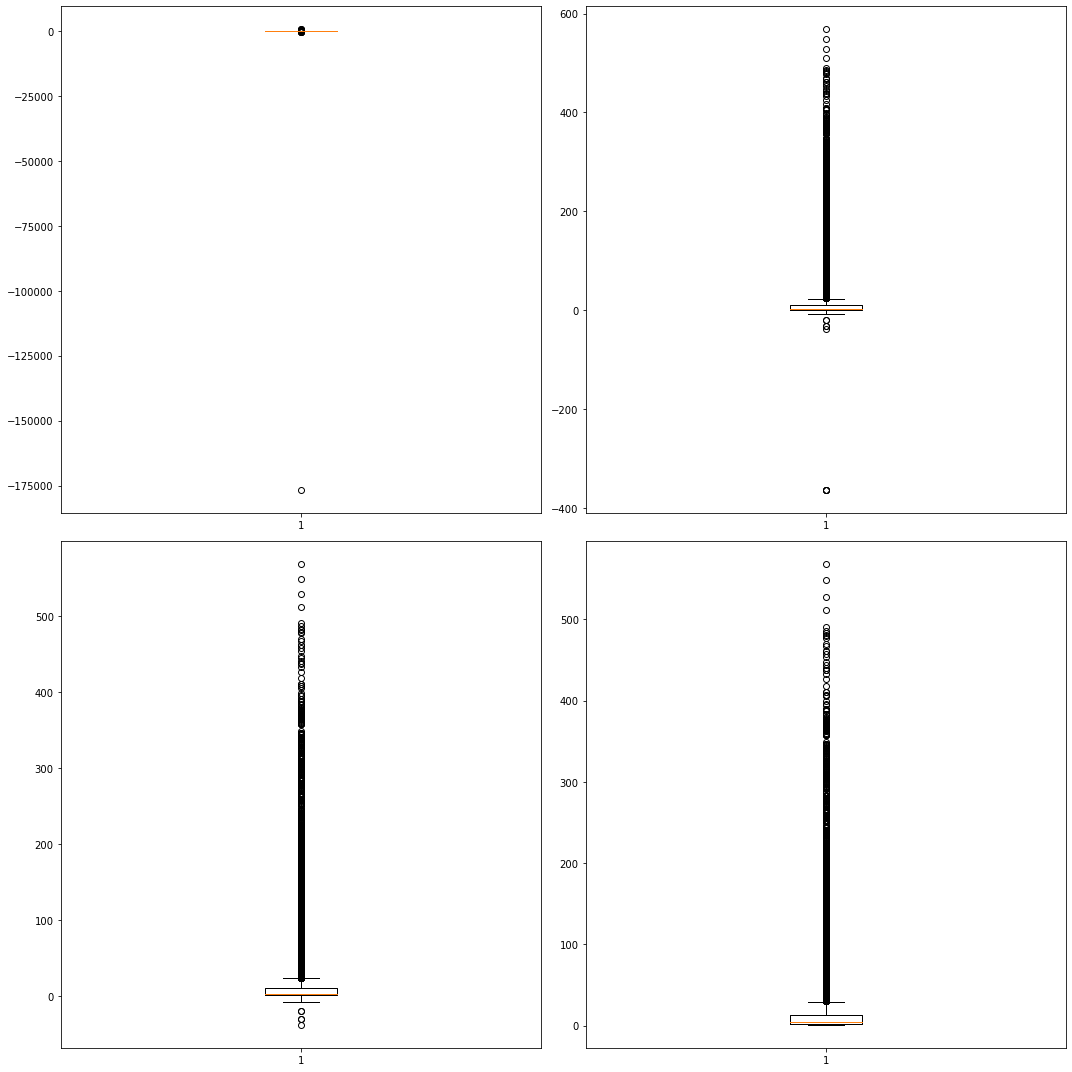

In [6]:
figure, axis = plt.subplots(2, 2, figsize=(15,15))
axis[0,0].boxplot(df_with_outliers['FireDuration'])
axis[0,1].boxplot(df_with_outliers['FireDuration'][df_with_outliers['FireDuration']>-176777])
axis[1,0].boxplot(df_with_outliers['FireDuration'][df_with_outliers['FireDuration']>-200])
axis[1,1].boxplot(df_with_outliers['FireDuration'][df_with_outliers['FireDuration']>0])
figure.tight_layout()
plt.show()

<b> whis = 5 </b>

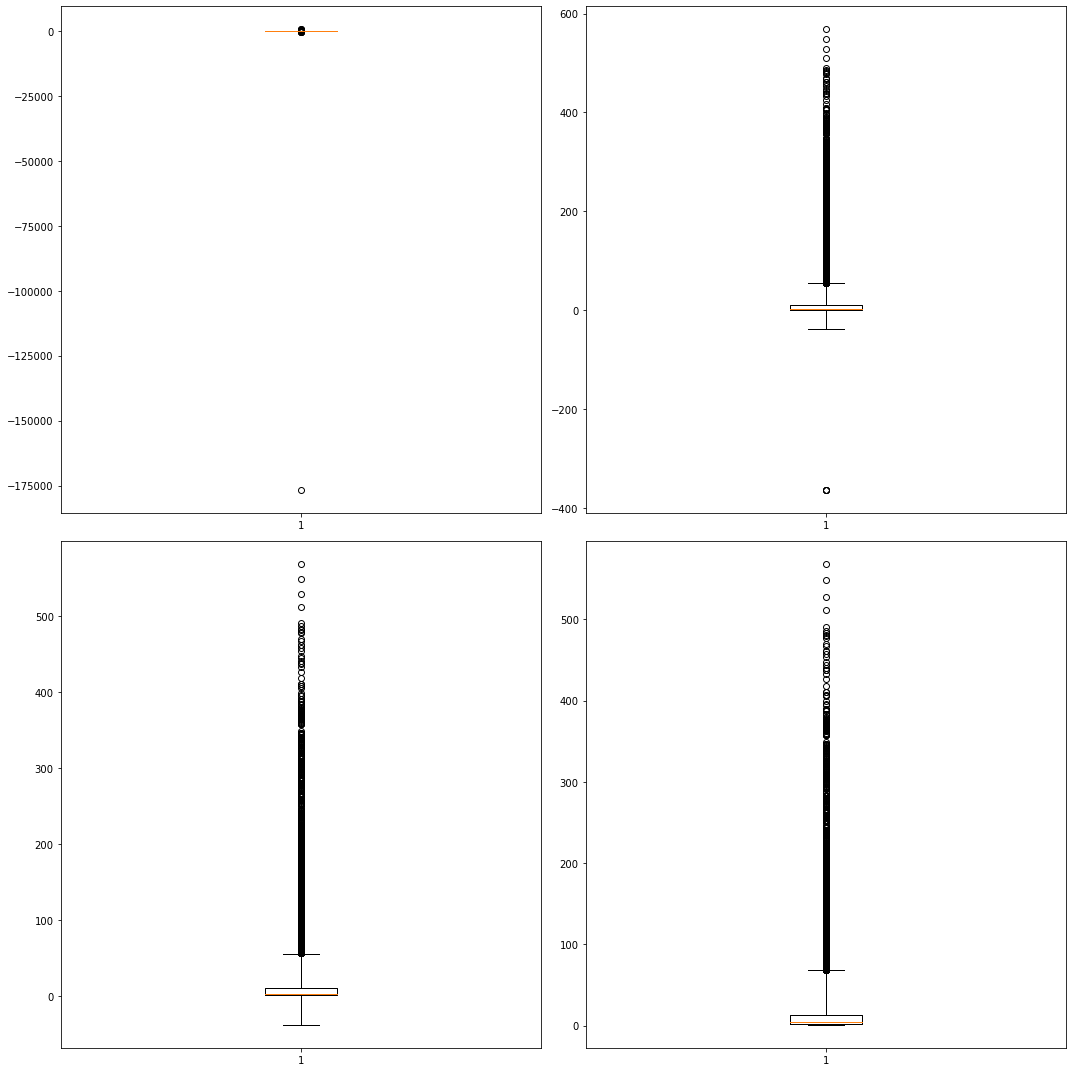

In [7]:
figure, axis = plt.subplots(2, 2, figsize=(15,15))
axis[0,0].boxplot(df_with_outliers['FireDuration'], whis=5)
axis[0,1].boxplot(df_with_outliers['FireDuration'][df_with_outliers['FireDuration']>-176777], whis=5)
axis[1,0].boxplot(df_with_outliers['FireDuration'][df_with_outliers['FireDuration']>-200], whis=5)
axis[1,1].boxplot(df_with_outliers['FireDuration'][df_with_outliers['FireDuration']>0], whis=5)
figure.tight_layout()
plt.show()

#### Geographic outliers
Latitude must be between: (-90, 90) <br>
Longitude must be between: (-180, 180) <br>
We found a lot of fire locations with a wrong latitude & longitude values which we will present by using a map:

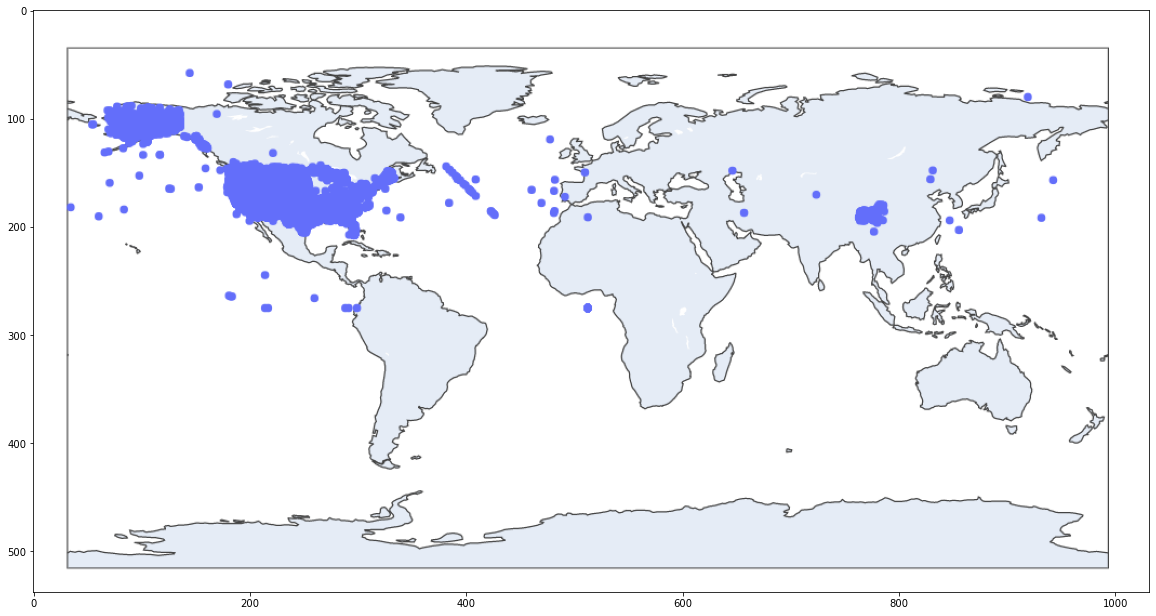

In [8]:
fig = px.scatter_geo(df_with_outliers,
                    lat=df_with_outliers.InitialLatitude,
                    lon=df_with_outliers.InitialLongitude)
#fig.show()
presentMap(FULL_MAP_PNG)

### Fire Cause Analysis
This section will present the Fire Cause Analysis

Text(0.5, 1.0, 'Fire Cause Analysis')

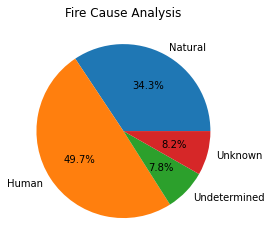

In [9]:
fireCause = df.FireCause.value_counts().sort_index()
data = fireCause.to_list()
labels = ['Natural', 'Human', 'Undetermined', 'Unknown']
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Fire Cause Analysis')

<AxesSubplot:title={'center':'Duration of Fire by Cause'}, xlabel='1 - Natural, 2 - Human, 3 - Undetermined, 4 - Unknown', ylabel='Days'>

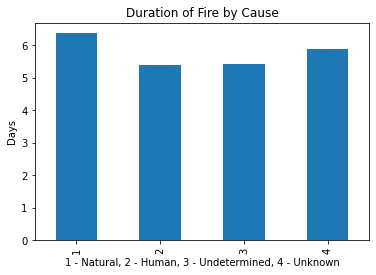

In [10]:
df.groupby(['FireCause']).mean()['FireDuration'].plot(
    kind = "bar", 
    title="Duration of Fire by Cause",
    ylabel = "Days", xlabel = "1 - Natural, 2 - Human, 3 - Undetermined, 4 - Unknown")

### Temperature & Wind Speed Cause Analysis
This section will present the combination of the Temperature & Wind Speed Cause Analysis

<AxesSubplot:xlabel='WindSpeed', ylabel='Temperature'>

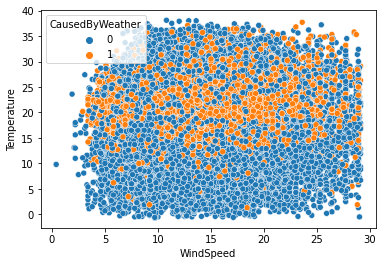

In [11]:
sns.scatterplot(data=df, x="WindSpeed", y="Temperature", hue="CausedByWeather")

The higher the temperature & wind speed the more caused by weather fires

### Temperature & Humidity Cause Analysis
This section will present the combination of the Temperature & Humidity Cause Analysis

<AxesSubplot:xlabel='Temperature', ylabel='Humidity'>

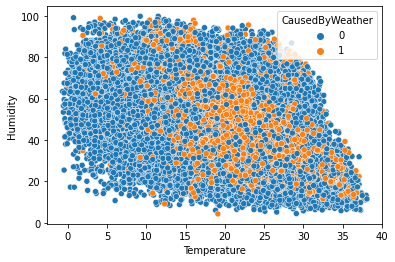

In [12]:
sns.scatterplot(data=df, x="Temperature", y="Humidity", hue="CausedByWeather")

The higher the temperature and lower humidity the more caused by weather fires

### Temperature & Fire Location
This section will present the temperature range according to the fire location

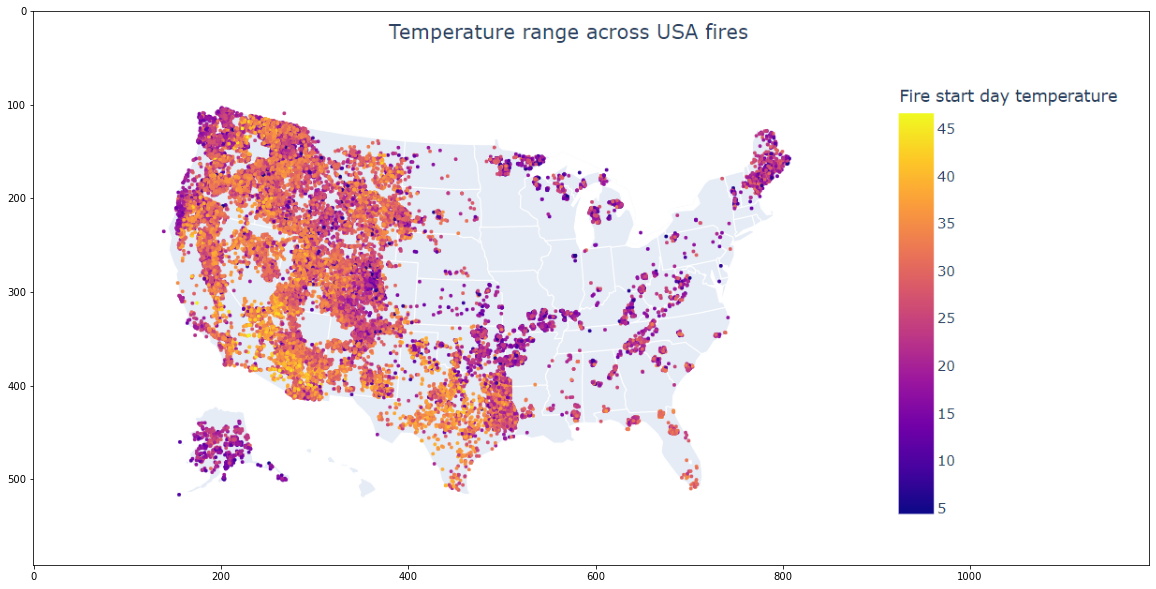

In [13]:
d = df.copy()
d = d[["InitialLatitude", "InitialLongitude", "MaxTemperature"]]
fig = px.scatter_geo(d,
                     lat='InitialLatitude',lon='InitialLongitude', 
                     hover_data=['MaxTemperature'], 
                     color=d['MaxTemperature'])
fig.update_layout(title = 'Temperature range across USA fires', 
                  title_x=0.5,
                  geo_scope='usa',
                  coloraxis_colorbar=dict(title="Fire start day temperature"))
fig.update_traces(marker=dict(size=3))
#fig.show()
presentMap(USA_MAP_PNG)

We can see that there is an impact of the temperature on the fires.